<a href="https://colab.research.google.com/github/jjavy/MCDAA/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos supervisados

El problema que se presenta es tratar de predecir cuánto se gastará; es decir, se trata de predecir la variable númerica `money`. Para lo cuál se investigaron los siguientes algoritmos.

## Regresión Lineal
Modelo:
${ŷ}=Xβ+ε$

Estima β minimizando MSE.

Ventaja: simple, interpretable. Buena baseline.

Limitación: solo captura relaciones lineales; sensible a multicolinealidad y outliers.

## Random Forest Regressor
Ensemble de árboles de decisión: promedia predicciones de cada árbol.

Captura relaciones no lineales, interacciones, robusto a outliers y escalado.

Importancia de variables disponible, fácil de entrenar, buen balance sesgo/varianza.

## Ridge / Lasso

Ridge: minimiza
$∥y-Xβ∥2+λ∥β∥2$

Lasso: añade
$λ∥β∥1$

Ventaja: controla overfitting y hace selección de variables (Lasso).

## k-Nearest Neighbors Regression (k-NN)

Predicción por promedio ponderado de los k vecinos más próximos.

No paramétrico, captura no linealidades locales.

Limitación: mal en alta dimensión, sensible a escala y ruido.

# Métricas para analizar error

## MAE (Mean Absolute Error)

$MAE=1/n∑_{i=1}^{n}|yi-{\hat y}i|$

Interpretable en unidades originales; robusto a outliers (menos que MSE).

## MSE (Mean Squared Error)

$MSE=1/n∑(yi-{\hat y}i)2$

Penaliza fuertemente errores grandes (por el cuadrado).

## RMSE (Root MSE)

$RMSE=\sqrt{MSE}$

Misma unidad que la variable — útil para comparar magnitud del error.

## MAPE (Mean Absolute Percentage Error)

$MAPE=100/n∑_{i=1}^{n}|yi-{\hat y}i/yi|$

Interpretable como porcentaje, pero problemático si $yi$ se acerca a 0.

Se decide aplicar **Random forest** a los datos para tratar de predecir `money`.

In [1]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Maestria/AA/Coffe_sales_cleaned.csv')

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[["hour_of_day","coffee_ordered","Time_of_Day","Weekdaysort","Monthsort", "money"]])
df_scaled = pd.DataFrame(scaled, columns=["hour_of_day","coffee_ordered","time_of_day","weekdaysort","monthsort", "money"])
df_scaled.head()

,hour_of_day,coffee_ordered,time_of_day,weekdaysort,monthsort,money
0,-0.988751,-0.247979,-1.223748,0.585532,-0.986757,1.446522
1,-0.516319,2.134421,0.006939,0.585532,-0.986757,1.446522
2,-0.516319,2.134421,0.006939,0.585532,-0.986757,1.446522
3,-0.280103,-1.200939,0.006939,0.585532,-0.986757,-0.562883
4,-0.280103,-0.247979,0.006939,0.585532,-0.986757,1.446522


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[["hour_of_day","coffee_ordered","time_of_day","weekdaysort","monthsort"]], df_scaled[["money"]], test_size=0.25)

In [5]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [11]:
import matplotlib.pyplot as plt

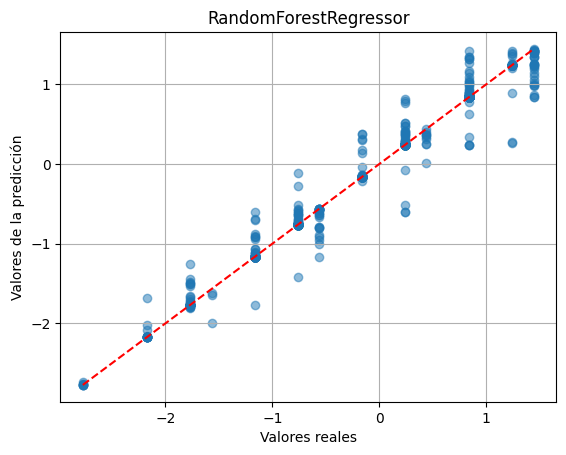

In [14]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Valores de la predicción")
plt.title(f"RandomForestRegressor")
plt.grid(True)
plt.show()

In [7]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mape = np.mean(np.abs((y_test.values.flatten() - y_pred) / y_test.values.flatten())) * 100
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape:.3f}")

MAE: 0.050, RMSE: 0.144, MAPE: 9.486


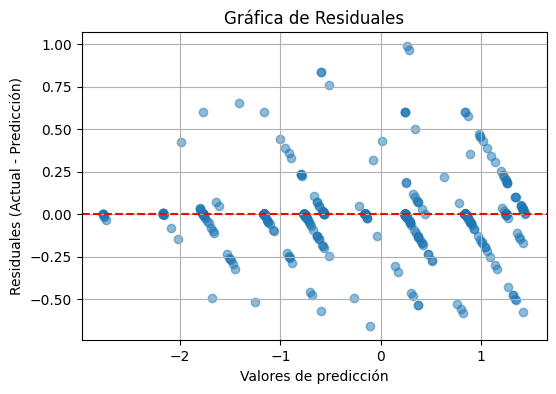

In [17]:
residuals = y_test.values.flatten() - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Valores de predicción")
plt.ylabel("Residuales (Actual - Predicción)")
plt.title("Gráfica de Residuales")
plt.grid(True)
plt.show()

In [9]:
pd.DataFrame({"feature": X_train.columns, "importance": model.feature_importances_}).sort_values("importance", ascending=False)

,feature,importance
1,coffee_ordered,0.858469
4,monthsort,0.124987
0,hour_of_day,0.009019
3,weekdaysort,0.006235
2,time_of_day,0.001290


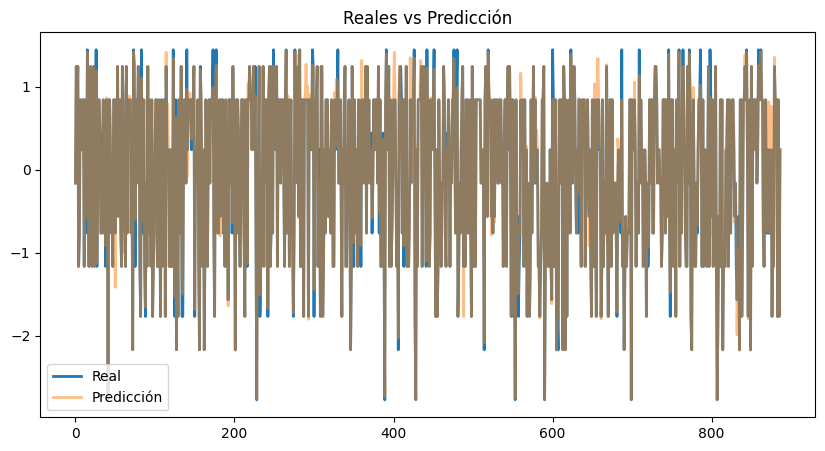

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Real", linewidth=2)
plt.plot(y_pred, label="Predicción", linewidth=2, alpha=0.5)
plt.title("Reales vs Predicción")
plt.legend()
plt.show()